### Boston and Seattle Airbnb Analysis
This is notebook of my first data science blog post. I will start by doing a detailed descriptive analysis of my data.
I will be using the [Boston AirNNB](https://www.kaggle.com/airbnb/boston) and [Seattle AirBnB](https://www.kaggle.com/airbnb/seattle/data) data for this project. In this project, I would be following the **CRISP-DM (Cross-Industry Standard Process for Data Mining)** process.

The data files contains the following main components:
    1. Calendar data: includes home availability, price and listing id.
    2. Listing data: includes full description and average review score of listings.
    3. Reviews data: includes house reviews and detailed comments from reviewers, unique id.


### 1. Business understanding: 
My main goal is to anawer the following questions:

**Main Question**: In which city is AirBNB giving customers a better experiences with respect to cost and living experiences.
I will try to answer this question by having a deep understanding of the questions below:
    1. What factors affect the listing prices the most in both cities?
    2. How does prices differ between Boston and Seattle?
    3. Can we predict the price of a listing?     

### 2. Data understanding    

I will be looking at the characteristics of the data to better understand its variables.

In [1]:
#import relevant packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
import warnings

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression


from collections import Counter
from scipy.stats.stats import pearsonr
from string import ascii_letters

# Needed to help our plots look cleaner with plotly 
import plotly.graph_objs as go
#import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)

pd.set_option('display.max_columns', 500)
warnings.filterwarnings('ignore')


In [2]:
#import Boston data
b_list = pd.read_csv('./boston_listings.csv') #boston_listings
b_cal = pd.read_csv('./boston_calendar.csv') #boston_calendar
b_rev = pd.read_csv('./boston_reviews.csv') #boston_review

#import seattle data
s_list = pd.read_csv('./seattle_listings.csv') #seattle_listings
s_cal = pd.read_csv('./seattle_calendar.csv') #seattle_calendar
s_rev = pd.read_csv('./seattle_reviews.csv') #seattle_reviews

In [3]:
#view the boston data
b_list.head()
b_cal.head()
b_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [4]:
#a detailed look at the variables of both datasets 
b_list.info() #boston dataset
b_cal.info()
b_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [5]:
#view the seattle data
s_list.head()
s_cal.head()
s_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [6]:
#a detailed look at the seattle dataset
s_list.info() #seattle dataset
s_cal.info()
s_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

### 3. Data preparation for analysis

#### Handling missing data






In [7]:
#check the number of rows and columns in the dataset
num_rows_b = b_list.shape[0] #no of rows for boston
num_cols_b = b_list.shape[1] #no of columns for boston

num_rows_s = s_list.shape[0] #no of rows for seattle
num_cols_s = s_list.shape[1] #no of columns for seattle

print('There are', num_rows_b,  'number of rows', 'and' ,  num_cols_b,  'in the Boston dataset')
print('There are', num_rows_s,  'number of rows', 'and' ,  num_cols_s,  'in the Seattle dataset')

There are 3585 number of rows and 95 in the Boston dataset
There are 3818 number of rows and 92 in the Seattle dataset


In [8]:
#check for missing values
#which columns have no missing values

no_nulls_b = set(b_list.columns[b_list.isnull().mean()==0]) #non-missing columns in boston dataset

no_nulls_s = set(s_list.columns[s_list.isnull().mean()==0]) #non-missing columns in seattle dataset

#no_nulls_b
#no_nulls_s

In [9]:
#columns with most missing values e.g 75% of missing values 

most_missing_cols_b = set(b_list.columns[b_list.isnull().mean() > 0.75]) #most missing columns in boston dataset
most_missing_cols_s = set(s_list.columns[s_list.isnull().mean() > 0.75]) #most missing columns in seattle dataset

print('These are the most missing columns for the Seattle dataset', most_missing_cols_s, 'and these for the Boston dataset',most_missing_cols_b) 

These are the most missing columns for the Seattle dataset {'license', 'square_feet'} and these for the Boston dataset {'jurisdiction_names', 'square_feet', 'neighbourhood_group_cleansed', 'has_availability', 'weekly_price', 'license', 'monthly_price'}


In [10]:
#to answer the main business understanding question: 
#"In which city is AirBNB giving customers a better experiences with respect to cost and living experiences",
#we need to see which columns would give us more information needed to answer this question

b_list.columns #view the columns in the boston dataset

s_list.columns #view the columns in the boston dataset

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [11]:
#define a function that gives an output of a clean dataset

def clean_data(data):
    """
    input: 
    data: pandas dataframe with data
    
    output:
    clean_data: data that is cleaned and it contains
    1. missing values are imputed with either mean, mode or dropped
    2. string containing prices are converted to numbers
    3. sign is removed from dollar amount
    4. drop columns that all values are unique or drop it if values are contain url links or not needed
    """
    
    not_needed_cols = ['access', 'interaction', 'house_rules','name', 'host_name', 'square_feet', 'id', 'host_id','summary', 'space', 'description', 'neighborhood_overview', 'notes', 
                       'host_since', 'host_location', 'host_about', 'host_neighbourhood', 'host_total_listings_count', 'street', 'neighbourhood', 
                       'minimum_nights', 'maximum_nights', 'city', 'zipcode', 'smart_location', 'latitude', 
                       'longitude', 'is_location_exact', 'weekly_price', 'monthly_price', 'require_guest_profile_picture', 
                       'require_guest_phone_verification', 'calculated_host_listings_count', 'availability_30', 'availability_60', 'availability_90', 
                       'availability_365', 'calendar_updated','transit']
    
    for i in data.columns:
        if len(data[i].unique()) == 1:
            data.drop(i, inplace=True, axis =1) #dropping columns that all the values are unique
        if ('url' in i):
            data.drop(i, inplace = True, axis =1) #dropping columns that contain url links
        if i in not_needed_cols:
            data.drop(i,inplace=True, axis=1) #dropping columns that are not needed    
          
           
    #we want to get those columns that have reviews
    review_col = []
    for i in data:
        if 'review' in i:
            review_col.append(i)
            
    #change the strings to numbers for price related columns to float
    data['price'] = data['price'].str.replace('[$, ]', '').astype('float')
    data['security_deposit'] = data['security_deposit'].str.replace('[$, ]', '').astype('float')        
    data['cleaning_fee'] = data['cleaning_fee'].str.replace('[$, ]', '').astype('float') 
    data['extra_people'] = data['extra_people'].str.replace('[$, ]', '').astype('float')
    
    
    #change all columns that are percentages to float
    data['host_response_rate'] = data['host_response_rate'].str.replace('[%, ]', '').astype('float')/100
    data['host_acceptance_rate'] = data['host_acceptance_rate'].str.replace('[%, ]', '').astype('float')/100
    
    
    #new metrics for review
    data['metric_review'] = data['reviews_per_month'] * data['review_scores_rating']/100
    
    #drop original review column
    data = data.drop(review_col, axis=1)
    
    return data
    

In [12]:
#applying the clean_data function to the boston dataset
b_list_clean = clean_data(b_list)
b_list_clean

#applying the clean_data function to the seattle dataset
s_list_clean = clean_data(s_list)
s_list_clean

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,state,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,instant_bookable,cancellation_policy,metric_review
0,within a few hours,0.96,1.0,f,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,West Queen Anne,Queen Anne,WA,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,NaN,NaN,2,5.0,f,moderate,3.8665
1,within an hour,0.98,1.0,t,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,West Queen Anne,Queen Anne,WA,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,100.0,40.0,1,0.0,f,strict,1.4208
2,within a few hours,0.67,1.0,f,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,West Queen Anne,Queen Anne,WA,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,1000.0,300.0,10,25.0,f,strict,1.1155
3,NaN,NaN,NaN,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,West Queen Anne,Queen Anne,WA,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",100.0,NaN,NaN,1,0.0,f,flexible,NaN
4,within an hour,1.00,NaN,f,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,West Queen Anne,Queen Anne,WA,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,700.0,125.0,6,15.0,f,strict,0.8188
5,NaN,NaN,NaN,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,West Queen Anne,Queen Anne,WA,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",""Free Parking on Premises...",120.0,NaN,40.0,1,30.0,f,strict,2.3275
6,within an hour,1.00,1.0,t,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,West Queen Anne,Queen Anne,WA,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",""Free Parking on Premises...",80.0,150.0,NaN,1,10.0,f,moderate,2.4354
7,within an hour,1.00,1.0,t,5.0,"['email', 'phone', 'facebook', 'google', 'link...",t,t,West Queen Anne,Queen Anne,WA,Cabin,Private room,2,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",""Pets live on this proper...",60.0,150.0,25.0,1,0.0,f,strict,4.5881
8,NaN,NaN,1.0,f,1.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,West Queen Anne,Queen Anne,WA,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",90.0,NaN,NaN,1,0.0,f,strict,1.1834
9,within an hour,0.98,1.0,t,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,West Queen Anne,Queen Anne,WA,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,100.0,40.0,1,0.0,f,strict,1.5035


In [13]:
#checking the columns in the clean boston dataset
len(b_list_clean.columns)
b_list_clean.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'market', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'instant_bookable',
       'cancellation_policy', 'metric_review'],
      dtype='object')

In [14]:
#checking the columns in the clean seattle dataset
len(s_list_clean.columns)
s_list_clean.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'state',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'instant_bookable',
       'cancellation_policy', 'metric_review'],
      dtype='object')

In [15]:
#neighbourhood_group_cleansed & state isn't in the boston dataset, so we will remove those manually from the seattle dataset
#market isn't in the seattle dataset, so we will manually remove it from the boston dataset

b_list_clean.drop('market', inplace=True, axis=1) #manually removing market from the boston dataset

s_list_clean.drop('neighbourhood_group_cleansed', inplace=True, axis=1)#removing neighbourhood_group_cleansed from the seattle dataset
s_list_clean.drop('state', inplace=True, axis=1)#removing state from the seattle dataset

In [16]:
#just checking to see the columns inupdated boston dataset
b_list_clean.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'instant_bookable', 'cancellation_policy', 'metric_review'],
      dtype='object')

In [17]:
#just checking to see the columns in updated seattle dataset
s_list_clean.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'instant_bookable', 'cancellation_policy', 'metric_review'],
      dtype='object')

In [18]:
#number of columns in both datasets
print('boston has', len(b_list_clean.columns), 'columns and seattle has' , len(s_list_clean.columns), 'columns' ) 

boston has 25 columns and seattle has 25 columns


### Question 1. What factors affect the listing price the most in both cities?
Since we now have a cleaner data, we will start answering my first question. We want to analyze the price feature and we will start by seeing the price distribution.

#### Analysing the numerical variables and how it relates to price

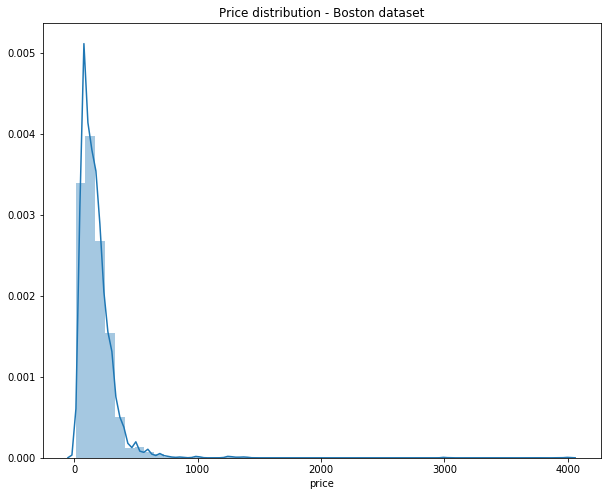

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64


In [19]:
#ploting a histogram of the distribution of price for boston dataset
#https://matplotlib.org/stable/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py

plt.figure(figsize=(10,8))
plt.title('Price distribution - Boston dataset')
#plt.hist(b_list_clean['price'],bins=50,density=True, facecolor='g', alpha=0.75)
sns.distplot(b_list_clean['price'],hist=True, kde=True)
plt.show()

print(b_list_clean['price'].describe())

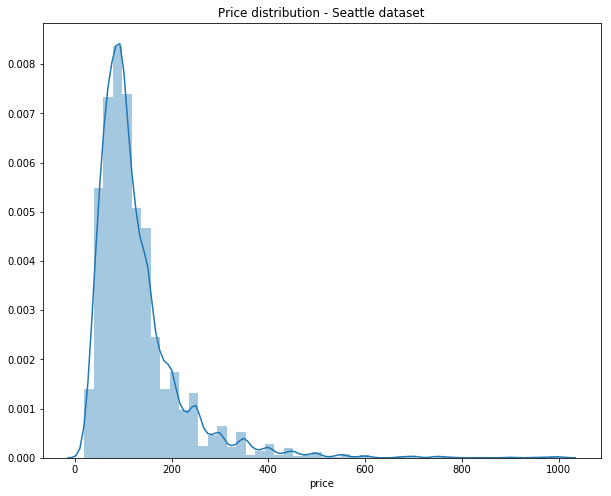

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64


In [20]:
#ploting a histogram of the distribution of price for seattle dataset
plt.figure(figsize=(10,8))
plt.title('Price distribution - Seattle dataset')
#plt.hist(b_list_clean['price'],bins=50,density=True, facecolor='g', alpha=0.75)
sns.distplot(s_list_clean['price'], hist=True, kde=True)
plt.show()

print(s_list_clean['price'].describe())

#### Findings from the histogram
    1. Boston dataset: From the above, we observe that most of the prices in the Boston dataset are within the range of 220 USD. There are also outliers in the dataset i.e some observations are less than 20 USD and some more than 2000 USD which is not expected in an Airbnb price listing. 

    2. Seattle dataset: From the above, we observe that most of the prices in the Seattle dataset are within the range of 150 USD. There are also outliers in the dataset i.e some observations are less than 30 USD and some more than 700 USD which is not expected in an Airbnb price listing. 

We will remove these outliers from both datasets and also normalize the distribution.

#### Handling outliers
Here, we will be removing rows where the prices are too small and too large from the datasets

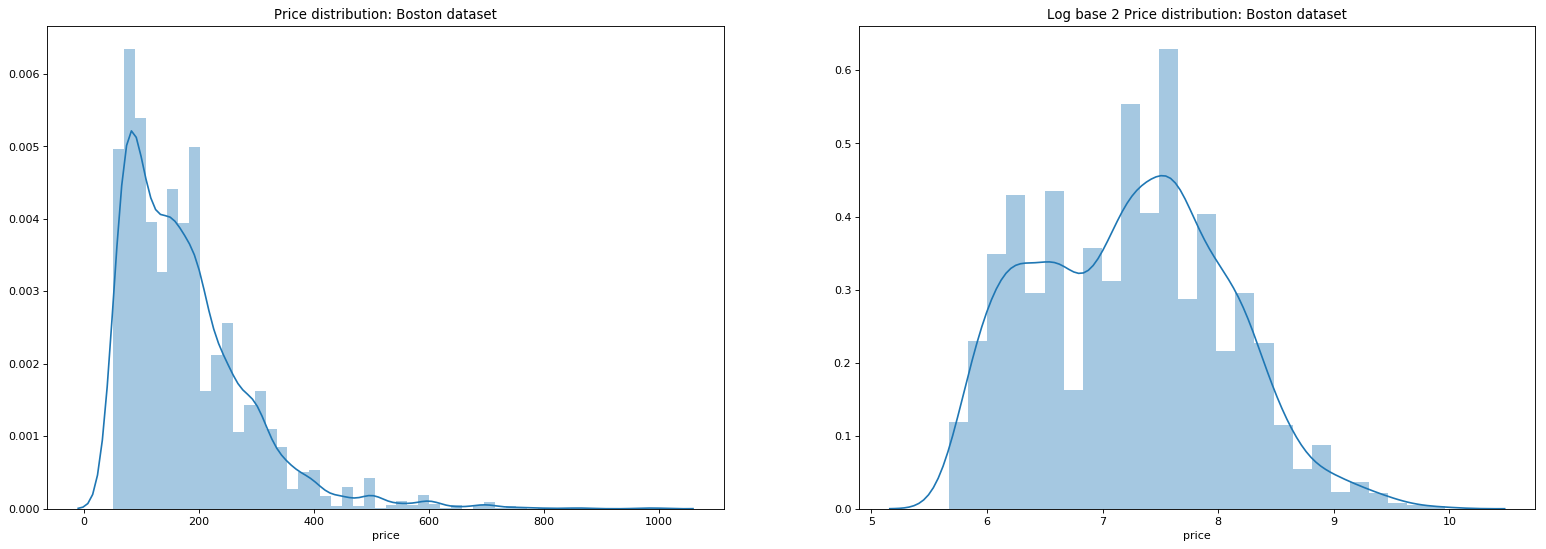

count    3347.000000
mean      177.674335
std       110.179936
min        51.000000
25%        95.000000
50%       150.000000
75%       225.000000
max       999.000000
Name: price, dtype: float64


In [21]:
#removing outlier from the boston dataset: only include rows that are between the $50 and $1000
b_list_clean_new = b_list_clean[(b_list_clean['price'] > 50) & (b_list_clean['price'] < 1000)]

fig, axs = plt.subplots(1, 2, figsize=(24, 8), dpi=80)
axs[0].set_title('Price distribution: Boston dataset')
axs[1].set_title('Log base 2 Price distribution: Boston dataset')
sns.distplot(b_list_clean_new['price'],kde=True, ax=axs[0])
sns.distplot(np.log2(b_list_clean_new['price']), kde=True,ax=axs[1]) #normalizing the price column
plt.show()

print(b_list_clean_new['price'].describe())

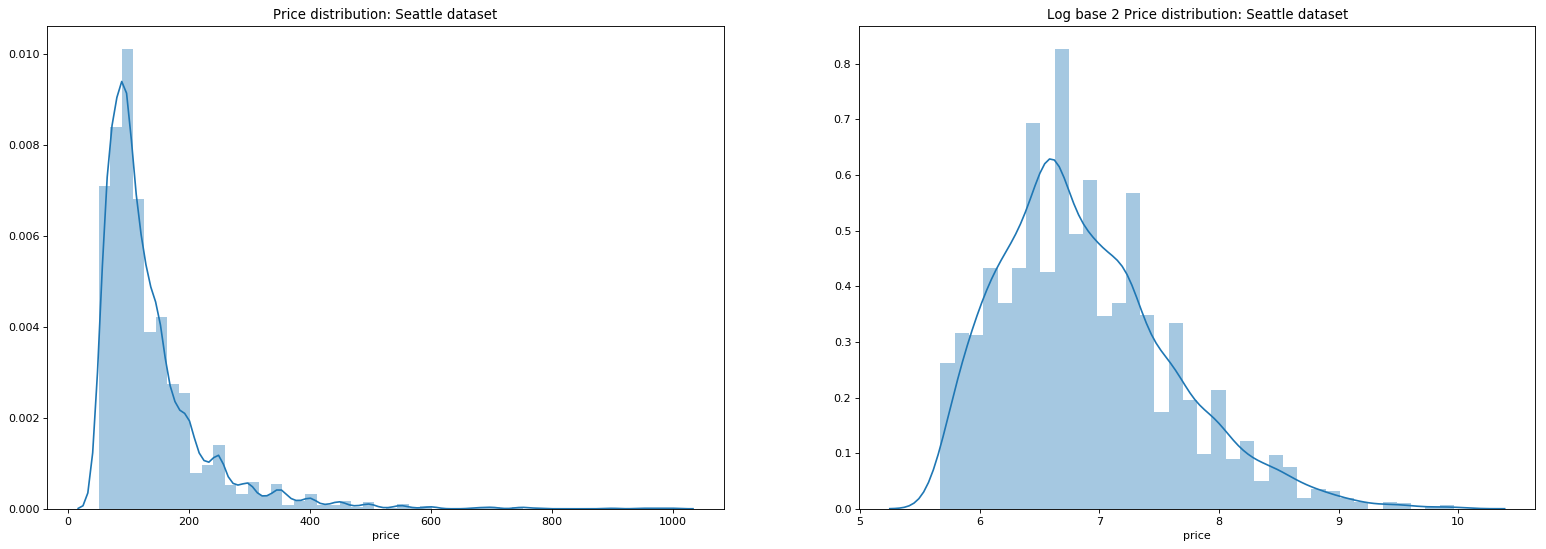

count    3468.000000
mean      136.364764
std        89.054887
min        51.000000
25%        82.000000
50%       110.000000
75%       155.000000
max       999.000000
Name: price, dtype: float64


In [22]:
#removing outlier from the seattle dataset: only include rows that are between the $50 and $1000
s_list_clean_new = s_list_clean[(s_list_clean['price'] > 50) & (s_list_clean['price'] < 1000)]

fig, axs = plt.subplots(1, 2, figsize=(24, 8), dpi=80)
axs[0].set_title('Price distribution: Seattle dataset')
axs[1].set_title('Log base 2 Price distribution: Seattle dataset')
sns.distplot(s_list_clean_new['price'],kde=True, ax=axs[0])
sns.distplot(np.log2(s_list_clean_new['price']), kde=True,ax=axs[1]) #normalizing the price column
plt.show()

print(s_list_clean_new['price'].describe())

From the above, we can see that the distribution of the logarithm of prices in both dataset is really good as seen from the shape of the distribution. We will be using this transformed data, for modelling later on.

#### Correlation between the numerical variables
To know the factors that affect listing price, we would have to have to plot a correlation matrix between the numerical variables.

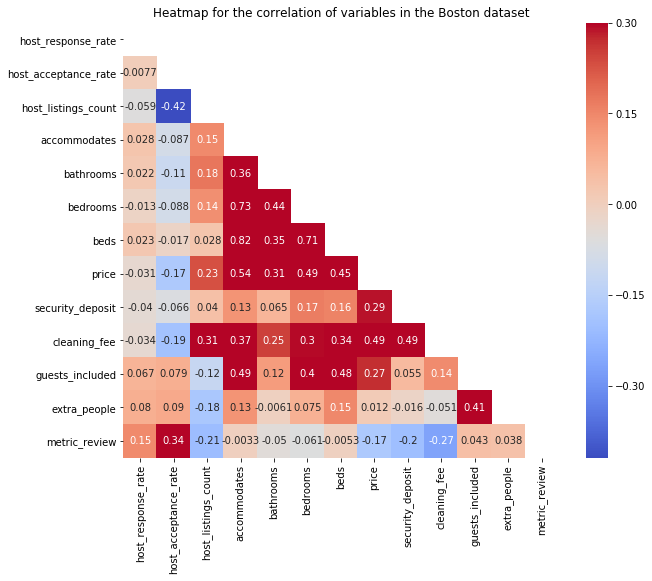

In [23]:
#heatmap showing the correlation btw varibles in the boston dataset

b_corr = b_list_clean_new.select_dtypes(include=['int64','float64']).corr()#selecting floats and int varibles for correlation
cover = np.zeros_like(b_corr)
cover[np.triu_indices_from(cover)] = True #masking the upper diagonal of the heatmap for more visualization

plt.figure(figsize=(10,8))
plt.title('Heatmap for the correlation of variables in the Boston dataset')
sns.heatmap(b_corr, square=True, annot=True, cmap='coolwarm', mask=cover, vmax=0.3)
plt.show()

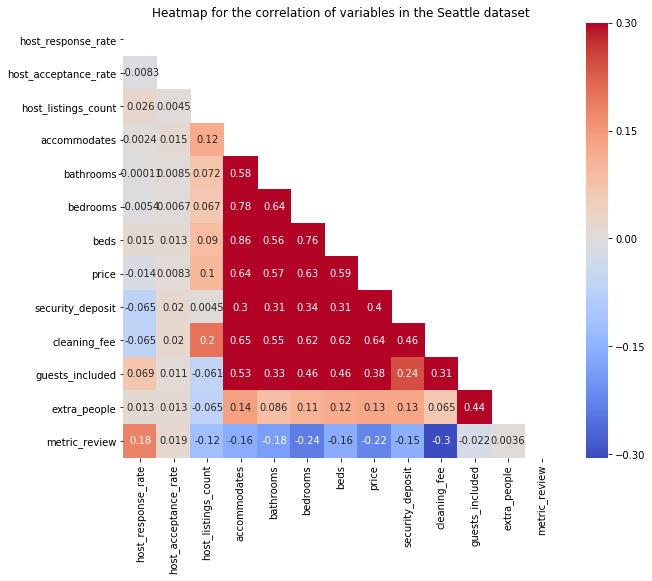

In [24]:
#heatmap showing the correlation btw varibles in the seattle dataset

s_corr = s_list_clean_new.select_dtypes(include=['int64','float64']).corr()#selecting floats and int varibles for correlation
cover = np.zeros_like(s_corr)
cover[np.triu_indices_from(cover)] = True #masking the upper diagonal of the heatmap for more visualization

plt.figure(figsize=(10,8))
plt.title('Heatmap for the correlation of variables in the Seattle dataset')
sns.heatmap(s_corr, square=True, annot=True, cmap='coolwarm', mask=cover, vmax=0.3)
plt.show()

#### Findings from the heatmap
In a correlation matrix, positive values indicates a strong relationship between two variables and a negative value indicates a weak relationship. From the above heatmaps, we observe that the following from both the Boston and Seattle datasets:

     1. The variables that have a strong relationship with price are accommodates, bathroom, bedrooms, beds, security_deposit, cleaning_fee, extra_people, guests_included e.t.c
     2. Interestingly, the metric_review variable which has to do with review_per_month and review_scores_rating has a negative relationship with price. We would not need this column in our price prediction model


#### More analysis on the factors affecting price
We will like to dig deeper into the variables bedroom, bathroom and see how it affects the price of a listing. In both datasets the cleaning_fee, bedrooms, bathrooms, and accommodates have a very strong positive relationship with price. Let's dig deeper into these variables.

In [25]:
#viewing the columns in the boston dataset
b_list_clean_new.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'instant_bookable', 'cancellation_policy', 'metric_review'],
      dtype='object')

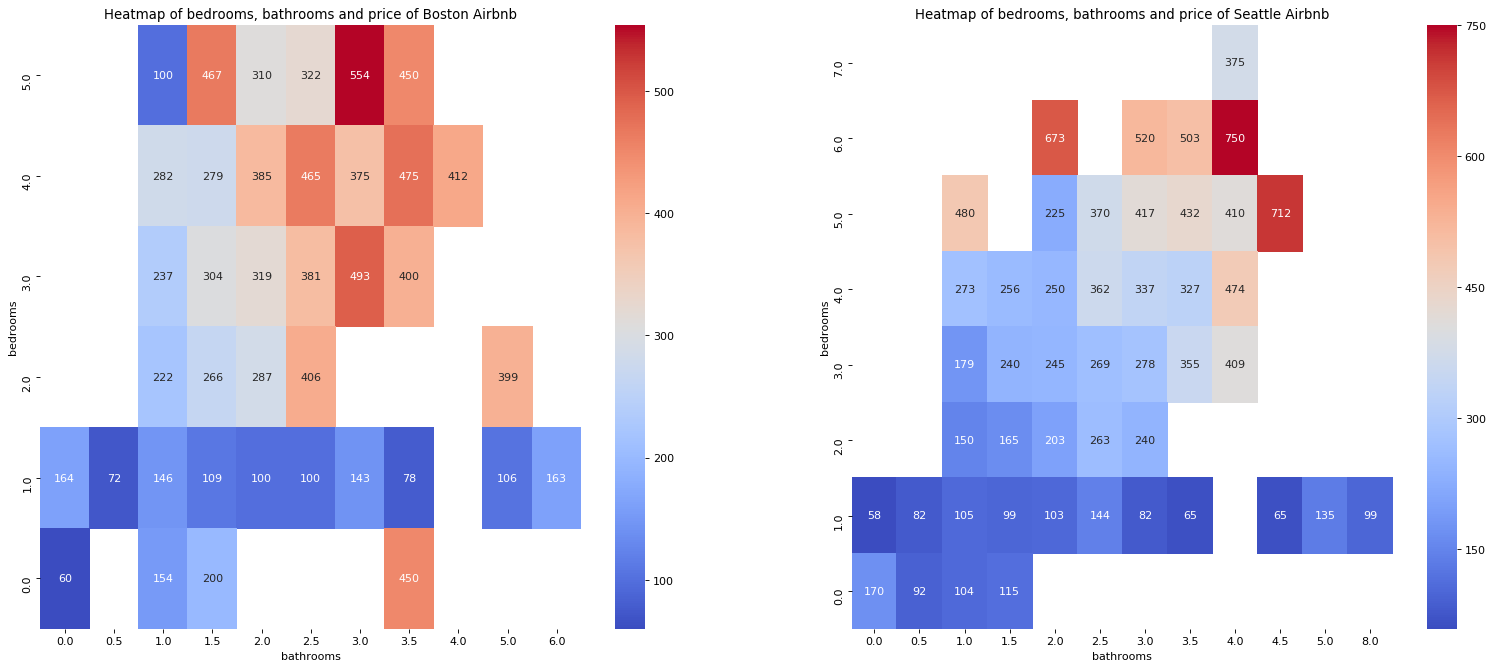

In [26]:
#how does bedroom and bathroom affect the price of a listing in both cities
#plot showing how bedrooms and bathrooms are affecting the listing price of Boston and Seattle Airbnb
fig, ax1 = plt.subplots(1, 2, figsize=(24, 10), dpi=80)
ax1[0].set_title('Heatmap of bedrooms, bathrooms and price of Boston Airbnb')
ax1[1].set_title('Heatmap of bedrooms, bathrooms and price of Seattle Airbnb')

#boston mean
b_price_mean = b_list_clean_new.groupby(['bedrooms','bathrooms']).mean().price.reset_index().pivot('bedrooms','bathrooms','price').sort_index(ascending=False)

#seattle mean
s_price_mean = s_list_clean_new.groupby(['bedrooms','bathrooms']).mean().price.reset_index().pivot('bedrooms','bathrooms','price').sort_index(ascending=False)

sns.heatmap(b_price_mean, cmap='coolwarm', fmt='.0f', annot= True, ax=ax1[0]) #boston heatmap
sns.heatmap(s_price_mean, cmap='coolwarm', fmt='.0f', annot= True, ax=ax1[1]) #seattle heatmap

plt.show()

In both cities, adding an extra bathroom cost more on average in both cities, but adding an extra bathroom costs more in Boston than in Seattle.


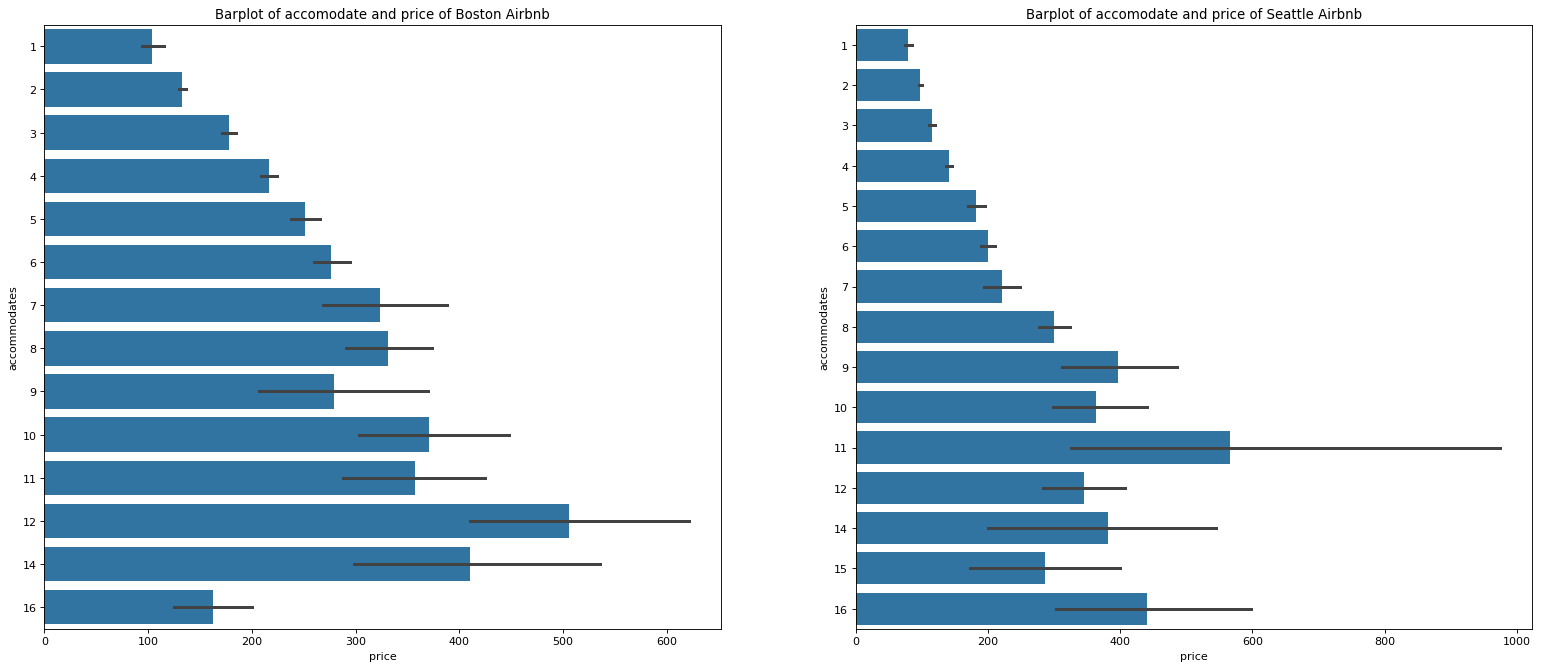

In [28]:
#how does accomodates affect the price in both Boston and Seattle
fig, ax1 = plt.subplots(1, 2, figsize=(24, 10), dpi=80)
ax1[0].set_title('Barplot of accomodate and price of Boston Airbnb')
ax1[1].set_title('Barplot of accomodate and price of Seattle Airbnb')


base_color = sns.color_palette()[0]

sns.barplot(data=b_list_clean_new, x='price', y='accommodates', orient='h', color = base_color,ax=ax1[0])

sns.barplot(data=s_list_clean_new, x='price', y='accommodates', orient='h', color = base_color,ax=ax1[1])

plt.show()

As we can see from the barplots above, the price increases as the number of people a listing can accomodate increases up to a certain number. 
1. For the Boston Airbnb, the price increases as the number of people it can accomodate increase and then it starts to fluctuate after 8 people. 
2. For Seattle Airbnb, the price increases as the number of people it can accomodate increase and then it starts to fluctuate after 9 people. 

#### Handling categorical data
We will now like to see how the categorical variables affect the price of a listing in Boston and Seattle.

In [29]:
#viewing the categorical variables in the datasets

b_list_clean_new.select_dtypes(include=['object']).info() #boston airbnb
s_list_clean_new.select_dtypes(include=['object']).info() #seattle airbnb

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3347 entries, 0 to 3584
Data columns (total 12 columns):
host_response_time        2932 non-null object
host_is_superhost         3347 non-null object
host_verifications        3347 non-null object
host_has_profile_pic      3347 non-null object
host_identity_verified    3347 non-null object
neighbourhood_cleansed    3347 non-null object
property_type             3344 non-null object
room_type                 3347 non-null object
bed_type                  3347 non-null object
amenities                 3347 non-null object
instant_bookable          3347 non-null object
cancellation_policy       3347 non-null object
dtypes: object(12)
memory usage: 499.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3468 entries, 0 to 3817
Data columns (total 12 columns):
host_response_time        2974 non-null object
host_is_superhost         3466 non-null object
host_verifications        3468 non-null object
host_has_profile_pic      3466 non-nul

In [30]:
#Function that converts categorical variables to dummy variables
def dummy_var(data, dummy_na):
    """
    input: 
    data - dataframe containing categorical variable I want to get dummy variables for
    col_cat - list of categorical variables columns
    dummy_na - checks if you want to dummy na columns or not (boolen)
    
    output:
    data - this contains the following:
    a. contains all categorical columns
    b. all original categorical variable columns are removed
    c. contains all categorical variable columns in col_cat 
    d. contain dummy columns f or nan values if dummy_na is True
    e. uses underscore(_) as a seperator for column names
    """
    
    #creating dummy variable for some categorical columns
    col_cat = ['host_response_time', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'cancellation_policy']
    
    for i in col_cat:
        try:
            data = pd.concat([data.drop(i,axis=1),pd.get_dummies(data[i],prefix=i, prefix_sep='_',drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return data       

In [31]:
#apply the dummy_var function to both Boston and Seattle datasets
b_list_clean_new = dummy_var(b_list_clean_new, dummy_na=False) #boston
s_list_clean_new = dummy_var(s_list_clean_new, dummy_na=False) #seattle

In [32]:
#check the lenght of both datesets
print('There are', len(b_list_clean_new.columns), 'columns in the Boston dataset and',len(s_list_clean_new.columns), 'in the Seattle Airbnb datasets' )
#len(b_list_clean_new.columns)
#len(s_list_clean_new.columns)

There are 29 columns in the Boston dataset and 28 in the Seattle Airbnb datasets


In [33]:
#check to see if there are columns in the boston dataset that are not in the seattle dataset
for i in b_list_clean_new:
    if i not in s_list_clean_new:
        print(i)

cancellation_policy_super_strict_30


The above results shows that the columns in Boston Airbnb dataset but not in the Seattle dataset

In [34]:
b_list_clean_new.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_verifications', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'metric_review',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'host_is_superhost_t',
       'host_has_profile_pic_t', 'host_identity_verified_t',
       'instant_bookable_t', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'cancellation_policy_super_strict_30'],
      dtype='object')

In [35]:
s_list_clean_new.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_verifications', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'metric_review',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour', 'host_is_superhost_t',
       'host_has_profile_pic_t', 'host_identity_verified_t',
       'instant_bookable_t', 'cancellation_policy_moderate',
       'cancellation_policy_strict'],
      dtype='object')

#### Analysing the categorical variables and how it relates to prices
We will have a look at how property_type affects the listing price in both Boston and Seattle Airbnb.

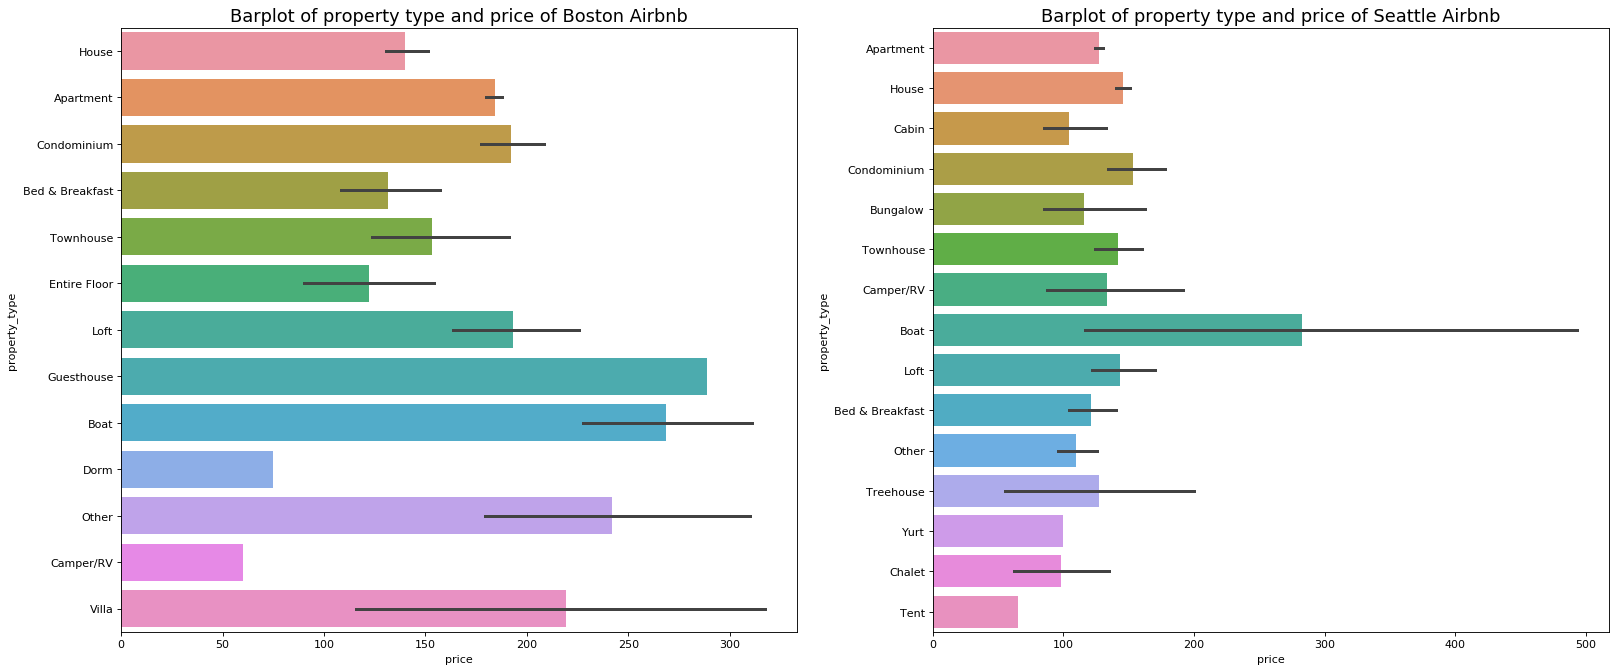

In [36]:
#how does property_type affect the price in both Boston and Seattle

fig, ax1 = plt.subplots(1, 2, figsize=(24, 10), dpi=80)
ax1[0].set_title('Barplot of property type and price of Boston Airbnb', fontsize=16)
ax1[1].set_title('Barplot of property type and price of Seattle Airbnb',fontsize=16)


base_color = sns.color_palette()[0]

sns.barplot(data=b_list_clean_new, x='price', y='property_type',ax=ax1[0]) #boston

sns.barplot(data=s_list_clean_new, x='price', y='property_type', ax=ax1[1]) #seattle

plt.show()

From the above, we see the following:
    1. Boston Airbnb: Guesthouses, boats, villas and lofts are the most expensive listings
    2. Seattle Airbnb: Boats, condominuims, houses, townhouses and lofts are the most expensive listings


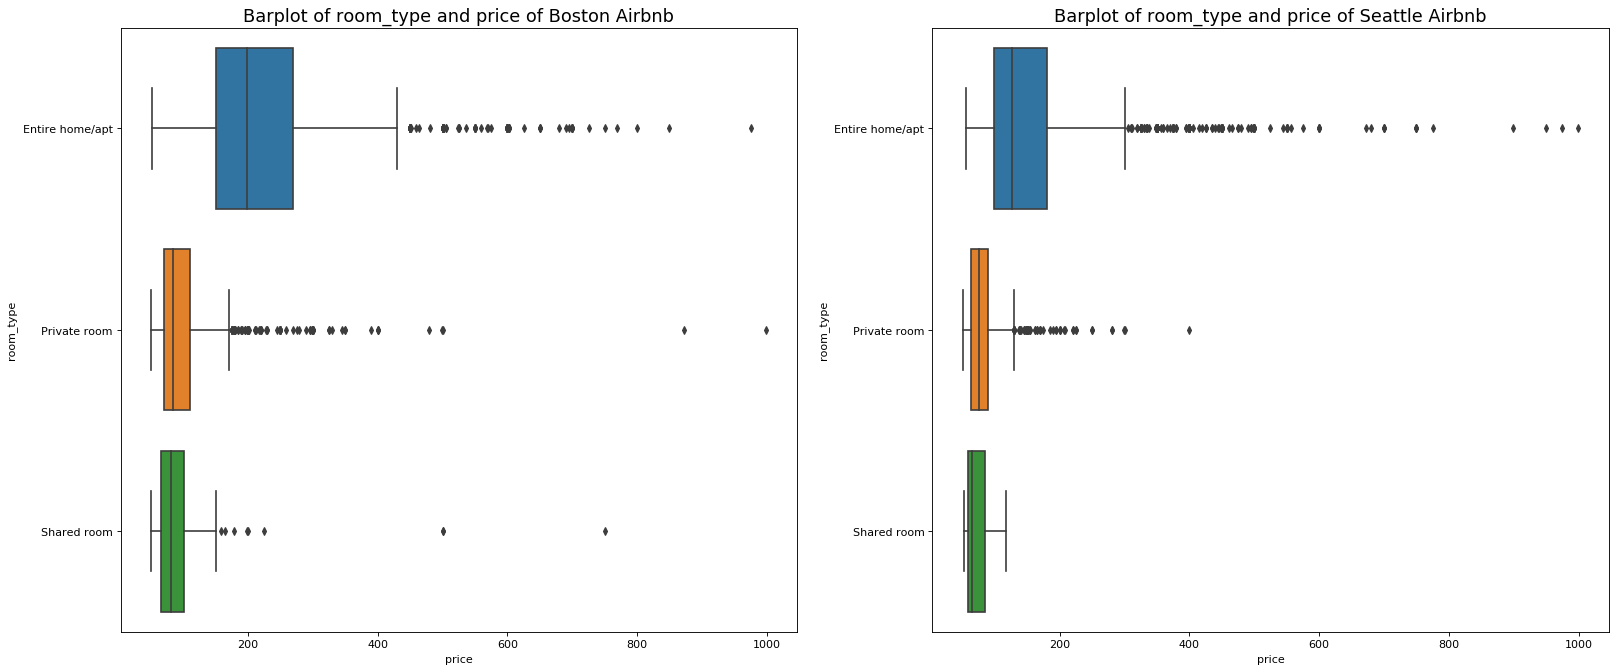

In [37]:
#how does room_type affect the price in both Boston and Seattle

fig, ax1 = plt.subplots(1, 2, figsize=(24, 10), dpi=80)
ax1[0].set_title('Barplot of room_type and price of Boston Airbnb', fontsize=16)
ax1[1].set_title('Barplot of room_type and price of Seattle Airbnb',fontsize=16)


base_color = sns.color_palette()[0]

sns.boxplot(data=b_list_clean_new, x='price', y='room_type',ax=ax1[0]) #boston

sns.boxplot(data=s_list_clean_new, x='price', y='room_type', ax=ax1[1]) #seattle

plt.show()

In both Boston and Seattle Airbnb, private rooms and shared rooms are cheaper than entire homes or apartment. This is however expected. But Boston tend to have a higher listing prices than Seattle.

### 4. Modelling the data
As shown in step 3, there are a number of categorical and numerical variables that affect the price of a listing. I however did the analysis of only a few of them. Please feel free to do more on the remaining columns as you see fit. 

Some of the categorical variables like bed_type, host_is_superhost, instant_bookable e.t.c can be transformed into numerical variables using the pandas get_dummies function as shown earlier. 

In the project, I will only be predicting the price using the Boston Airbnb dataset. This can be generalized to be used with the Seattle Airbnb data as well.

In [38]:
#categorical variable to be used for modelling
b_list_clean_new.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3347 entries, 0 to 3584
Data columns (total 6 columns):
host_verifications        3347 non-null object
neighbourhood_cleansed    3347 non-null object
property_type             3344 non-null object
room_type                 3347 non-null object
bed_type                  3347 non-null object
amenities                 3347 non-null object
dtypes: object(6)
memory usage: 343.0+ KB


In [39]:
#numerical variable to be used for modelling
b_list_clean_new.select_dtypes(include=['float','int']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3347 entries, 0 to 3584
Data columns (total 13 columns):
host_response_rate      2932 non-null float64
host_acceptance_rate    2932 non-null float64
host_listings_count     3347 non-null int64
accommodates            3347 non-null int64
bathrooms               3335 non-null float64
bedrooms                3337 non-null float64
beds                    3338 non-null float64
price                   3347 non-null float64
security_deposit        1263 non-null float64
cleaning_fee            2343 non-null float64
guests_included         3347 non-null int64
extra_people            3347 non-null float64
metric_review           2615 non-null float64
dtypes: float64(10), int64(3)
memory usage: 526.1 KB


In [40]:
#selecting  numerical columns 

col_num = ['price', 'accommodates', 'bedrooms', 'bathrooms', 'beds', 'security_deposit', 
             'cleaning_fee', 'guests_included', 'extra_people', 'metric_review'] #selected numerical columns

numeric_cols = b_list_clean_new.select_dtypes(include=['int64', 'float64'])[col_num]
print(numeric_cols.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3347 entries, 0 to 3584
Data columns (total 10 columns):
price               3347 non-null float64
accommodates        3347 non-null int64
bedrooms            3337 non-null float64
bathrooms           3335 non-null float64
beds                3338 non-null float64
security_deposit    1263 non-null float64
cleaning_fee        2343 non-null float64
guests_included     3347 non-null int64
extra_people        3347 non-null float64
metric_review       2615 non-null float64
dtypes: float64(8), int64(2)
memory usage: 447.6 KB
None


In [44]:
#transforming categorical columns to numeric
col_cat = ['room_type', 'bed_type', 'neighbourhood_cleansed', 'amenities','host_verifications','property_type']#selected categorical columns

numeric_cols[col_cat] = b_list_clean_new[col_cat] #numerical columns for Boston Airbnb dataset

copy_num = numeric_cols.copy() # create a copy of the numerical columns to be used in modelling

#creating a dictionary in preparation for the dummy function
copy_num =copy_num.replace({ "room_type": {"Entire home/apt": 1, "Private room": 2, "Shared room": 3},
                               "bed_type": {"Real Bed": 1, "Futon": 2, "Airbed": 3, "Pull-out Sofa": 4, "Couch": 5}})

dummy = pd.get_dummies(copy_num)
print(dummy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3347 entries, 0 to 3584
Columns: 3007 entries, price to property_type_Villa
dtypes: float64(8), int64(4), uint8(2995)
memory usage: 9.9 MB
None


In [45]:
# Fill missing numeric columns with the mean for those left
num_vars = dummy.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    dummy[col].fillna((dummy[col].mean()), inplace=True)

#### Training and evaluating the model
In this project, we will be developing a model to predict an Airbnb listing price using the Boston dataset.

In [46]:
dummy.head()

,price,accommodates,bedrooms,bathrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,metric_review,room_type,bed_type,neighbourhood_cleansed_Allston,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Charlestown,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Downtown,neighbourhood_cleansed_East Boston,neighbourhood_cleansed_Fenway,neighbourhood_cleansed_Hyde Park,neighbourhood_cleansed_Jamaica Plain,neighbourhood_cleansed_Leather District,neighbourhood_cleansed_Longwood Medical Area,neighbourhood_cleansed_Mattapan,neighbourhood_cleansed_Mission Hill,neighbourhood_cleansed_North End,neighbourhood_cleansed_Roslindale,neighbourhood_cleansed_Roxbury,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_South Boston Waterfront,neighbourhood_cleansed_South End,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Roxbury,"amenities_{""24-Hour Check-in""}","amenities_{""Air Conditioning"",""Free Parking on Premises"",""Smoking Allowed"",""Pets Allowed"",""Family/Kid Friendly"",""First Aid Kit"",Essentials,""Lock on Bedroom Door""}","amenities_{""Air Conditioning"",""Free Parking on Premises"",""Smoking Allowed"",Breakfast,Heating,""Family/Kid Friendly"",Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",Essentials,Shampoo,""24-Hour Check-in"",Hangers,Iron}","amenities_{""Air Conditioning"",""Pets live on this property"",Cat(s),""Indoor Fireplace"",Heating,Washer,Dryer,""Smoke Detector"",Shampoo}","amenities_{""Air Conditioning"",""Wheelchair Accessible"",Kitchen,""Elevator in Building"",""Buzzer/Wireless Intercom"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Safety Card"",""Fire Extinguisher"",Essentials,Hangers,""Laptop Friendly Workspace""}","amenities_{""Air Conditioning"",""Wheelchair Accessible"",Kitchen,""Pets Allowed"",""Elevator in Building"",""Hot Tub"",""Buzzer/Wireless Intercom"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""Fire Extinguisher"",Essentials,Shampoo}","amenities_{""Air Conditioning"",Heating,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Fire Extinguisher"",Essentials,""Lock on Bedroom Door"",Hangers,""Laptop Friendly Workspace""}","amenities_{""Air Conditioning"",Heating,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",Essentials,""Lock on Bedroom Door"",Hangers,""Laptop Friendly Workspace"",""translation missing: en.hosting_amenity_49"",""translation missing: en.hosting_amenity_50""}","amenities_{""Air Conditioning"",Heating,""Smoke Detector"",""Fire Extinguisher"",Essentials,""Laptop Friendly Workspace"",""translation missing: en.hosting_amenity_49"",""translation missing: en.hosting_amenity_50""}","amenities_{""Air Conditioning"",Kitchen,""Buzzer/Wireless Intercom"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Fire Extinguisher"",Essentials,Shampoo,""24-Hour Check-in"",Hangers,""Laptop Friendly Workspace""}","amenities_{""Air Conditioning"",Kitchen,""Elevator in Building"",""Buzzer/Wireless Intercom"",Heating,Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",Essentials,Shampoo,""Lock on Bedroom Door"",Hangers,""Hair Dryer""}","amenities_{""Air Conditioning"",Kitchen,""Elevator in Building"",""Indoor Fireplace"",""Buzzer/Wireless Intercom"",Heating,Washer,Dryer,Essentials}","amenities_{""Air Conditioning"",Kitchen,""Free Parking on Premises"",""Hot Tub"",Heating,""Family/Kid Friendly"",Washer,Dryer,Essentials,""translation missing: en.hosting_amenity_50""}","amenities_{""Air Conditioning"",Kitchen,""Indoor Fireplace"",Heating,Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",Essentials,Hangers,""Hair Dryer"",Iron,""Laptop Friendly Workspace"",""translation missing: en.hosting_amenity_49"",""translation missing: en.hosting_amenity_50""}","amenities_{""Air Conditioning"",Kitchen,""P

In [47]:
#building the model for price prediction

y = np.log2(dummy['price'].astype(int)) #We want to predict price (response variable)
X = dummy.drop('price', axis=1) # predictive variables (removing price from it)

#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [48]:
#creating an instance of a Random Forest Regressor 
model_rf = RandomForestRegressor(n_estimators=100, random_state=47)    

In [49]:
#fit the model with the training data
model_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=47, verbose=0, warm_start=False)

In [50]:
#prediction
predict = model_rf.predict(X_test)

In [51]:
#calculation of the mean absolute error
mean_abs_error = mean_absolute_error(y_test, predict)

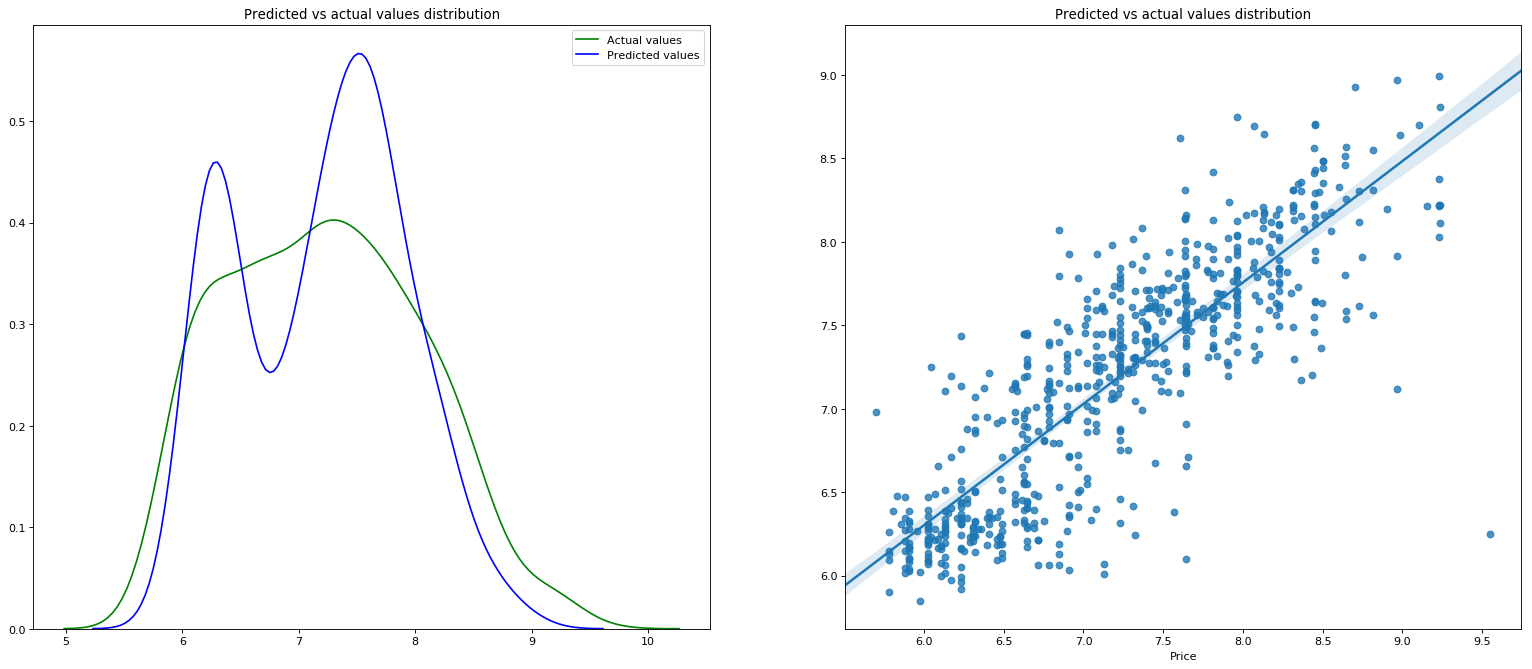

Mean absolute error of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=47, verbose=0, warm_start=False): 0.32749313244587397


In [52]:
#plot showing the prediction and actual values

fig, axs = plt.subplots(1, 2, figsize=(24, 10), dpi=80)
axs[0].set_title('Predicted vs actual values distribution')
ax1 = sns.kdeplot(data=y_test, color="g", label='Actual values', ax=axs[0])
ax2 = sns.kdeplot(data=predict, color="b", label='Predicted values', ax=ax1)
    
sns.regplot(x=y_test, y=predict)
plt.title('Predicted vs actual values distribution')
plt.xlabel('Price')
plt.legend()
plt.show()
plt.close()
    
print("Mean absolute error of {0}: {1}".format(model_rf,mean_abs_error))

We can see that the model is trained and evaluated using the RandomForestRegressor. The absolute mean error is 0.32 which isn't bad, but there are opportunities to do better and try out other models and compare. 

### 5. Evaluation of results to answer questions of interest

**Main Question**: In which city is Airbnb giving customers a better experiences with respect to cost and living experiences. From the above analysis, we will try to answer our questions of interest.
 

### 1. What factors affect the listing price the most in both cities?
There are several factors affecting the Airbnb listing price in Boston and Seattle. The selected variables include the following:
    1. Numerical variables: accommodates, bedrooms, bathrooms, beds, security_deposit, cleaning_fee, guests_included, extra_people. 
    2. Categorical variables: room_type, bed_type,  host_verifications, neighbourhood_cleansed, market, property_type, amenities.

### 2. How does prices differ between Boston and Seattle?
From the above study, we say that the prices differ between Boston and Seattle in the following ways:
    1. In both cities, adding an extra bathroom cost more on average, but adding an extra bathroom costs more in Boston than in Seattle.
    2. In both cities, private rooms and shared rooms are cheaper than entire homes or apartment. This is however expected. But Boston tend to have a higher listing prices than Seattle.  
    3. For Boston Airbnb, guesthouses, boats, villas and lofts are the most expensive listings, while for Seattle Airbnb, boats, condominuims, houses, townhouses and lofts are the most expensive listings.
    4. In Boston Airbnb, price increases as the number of people it can accommodate increase and then it starts to fluctuate after accommodating 8 people. But for Seattle Airbnb, the price increases as the number of people it can accommodate increase and then it starts to fluctuate after the accommodating of 9 people.

### 3. Can we predict the prices of a listing? 
Yes, I predicted the price of a Boston Airbnb listing using the RandomForestRegressor. The absolute mean error is 0.32 which isn't bad, but there are opportunities to do better and try out and compare other models. 